In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df0 = pd.read_csv('./result/00_nol2_record.csv')
bn_df0 = pd.read_csv('./result/00_bn_nol2_record.csv')

# CNN autoL2
df1 = pd.read_csv('./result/01_1e-5.csv')
df2 = pd.read_csv('./result/01_5e-4.csv')
df3 = pd.read_csv('./result/01_1e-4.csv')
df4 = pd.read_csv('./result/01_autoL2.csv')
# df.head()

# CNN autoL2 with batch normalization
bn_df1 = pd.read_csv('./result/02_bn_1e-05.csv')
bn_df2 = pd.read_csv('./result/02_bn_5e-04.csv')
bn_df3 = pd.read_csv('./result/02_bn_1e-04.csv')
bn_df4 = pd.read_csv('./result/02_bn_autoL2.csv')

# CNN autoL2 with percentage modification
pct5_df1 = pd.read_csv('./result/03_autoL2_by5pctg.csv')
pct5_df2 = pd.read_csv('./result/03_autoL2_by5pctg_bn.csv')
pct10_df1 = pd.read_csv('./result/03_autoL2_by10pctg.csv')
pct10_df2 = pd.read_csv('./result/03_autoL2_by10pctg_bn.csv')

# CNN autoL2 with increase/decrease lambda
adv_df1 = pd.read_csv('./result/04_AdvanceL2.csv')
adv_df2 = pd.read_csv('./result/04_AdvanceL2_bn.csv')

# exactly the same as those above, second attempt
adv_df1c = pd.read_csv('./result/04_AdvanceL2_attempt2.csv')
adv_df2c = pd.read_csv('./result/04_AdvanceL2_bn_attempt2.csv')

# CNN autoL2 with increase/decrease lambda plus percentage modification
adv_5_df1 = pd.read_csv('./result/05_AdvanceL2_by5pctg.csv')
adv_5_df2 = pd.read_csv('./result/05_AdvanceL2_by5pctg_bn.csv')

In [2]:
batch_size = 128
batch_num = int(50000/batch_size) +1
print(batch_num)

391


In [3]:
def plot_acc_and_lambda(input_df1, input_df2, input_df3, input_df4, title, legend, batch_num):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,6))
    
    epochs = [e for e in range(1, 201)]
    epoch_steps = []
    
    acc_df1 = acc_plot_preparation(input_df1, batch_num)
    acc_df2 = acc_plot_preparation(input_df2, batch_num)
    acc_df3 = acc_plot_preparation(input_df3, batch_num)
    acc_df4 = acc_plot_preparation(input_df4, batch_num)
    
    ax1.plot(epochs,
             acc_df1,
             linestyle = '-',
             linewidth = 1,
             color = 'black',
            )
    ax1.plot(epochs,
             acc_df2,
             linestyle = '-',
             linewidth = 1,
             color = 'red',
            )
    ax1.plot(epochs,
             acc_df3,
             linestyle = '-',
             linewidth = 1,
             color = 'blue',
            )
    ax1.plot(epochs,
             acc_df4,
             linestyle = '-',
             linewidth = 1,
             color = 'green',
            )
    ax1.set(xlabel='Epochs', ylabel='Test accuracy')
    ax1.legend(legend)
    
    df1 = lambda_plot_preparation(input_df1, batch_num)
    df2 = lambda_plot_preparation(input_df2, batch_num)
    df3 = lambda_plot_preparation(input_df3, batch_num)
    df4 = lambda_plot_preparation(input_df4, batch_num)

    ax2.plot(df1['epoch_steps'],
             df1['Lambda_L2s'],
             linestyle = '-',
             linewidth = 1,
             color = 'black',
            )
    ax2.plot(df2['epoch_steps'],
             df2['Lambda_L2s'],
             linestyle = '-',
             linewidth = 1,
             color = 'red',
            )
    ax2.plot(df3['epoch_steps'],
             df3['Lambda_L2s'],
             linestyle = '-',
             linewidth = 1,
             color = 'blue',
            )
    ax2.plot(df4['epoch_steps'],
             df4['Lambda_L2s'],
             linestyle = '-',
             linewidth = 1,
             color = 'green',
            )

    ax2.set(xlabel='Epochs', ylabel='Lambda',  yscale='log', xscale='log')
    ax2.legend(legend)
    fig.suptitle(title, fontsize = 25)
    
    for item in ([ax1.title, ax1.xaxis.label, ax1.yaxis.label, ax2.title, ax2.xaxis.label, ax2.yaxis.label] +
             ax1.get_xticklabels() + ax1.get_yticklabels() + ax2.get_xticklabels() + ax2.get_yticklabels()):
        item.set_fontsize(15)
    
def acc_plot_preparation(my_df, N):
    return np.array(my_df[my_df['steps']==N-1]['test_acc']/100)

def lambda_plot_preparation(my_df, N):
    my_df['epoch_steps'] = my_df['epochs'] + my_df['steps']/N
    return my_df

# Original setup in paper - CNN
Not showing AutoL2 is better

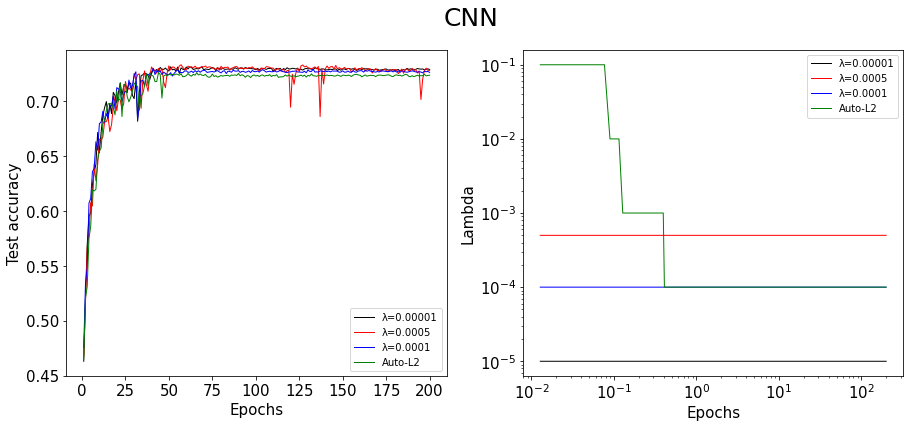

In [135]:
legend = ["λ=0.00001" ,"λ=0.0005", "λ=0.0001", "Auto-L2"]
plot_acc_and_lambda(df1, df2, df3, df4, 'CNN', legend, batch_num)

# Original setup in paper - CNN with Batch Normalization
Not showing AutoL2 is better

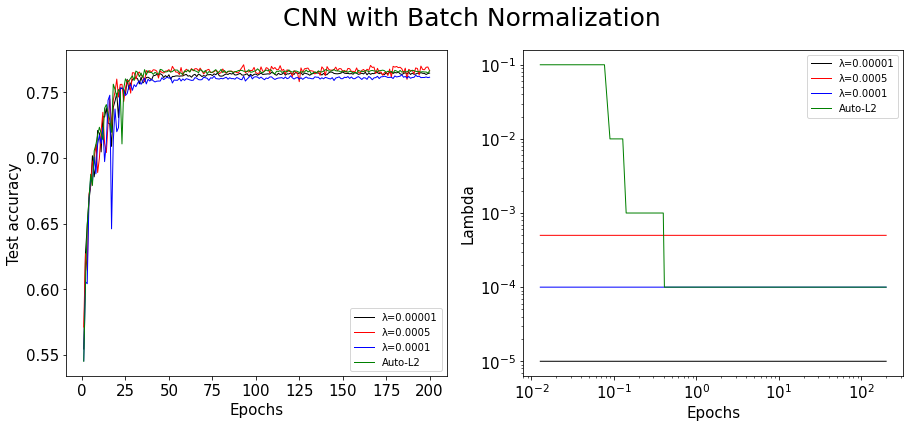

In [136]:
legend = ["λ=0.00001" ,"λ=0.0005", "λ=0.0001", "Auto-L2"]
plot_acc_and_lambda(bn_df1, bn_df2, bn_df3, bn_df4, 'CNN with Batch Normalization', legend, batch_num)

# Add percentage threshold into Auto L2

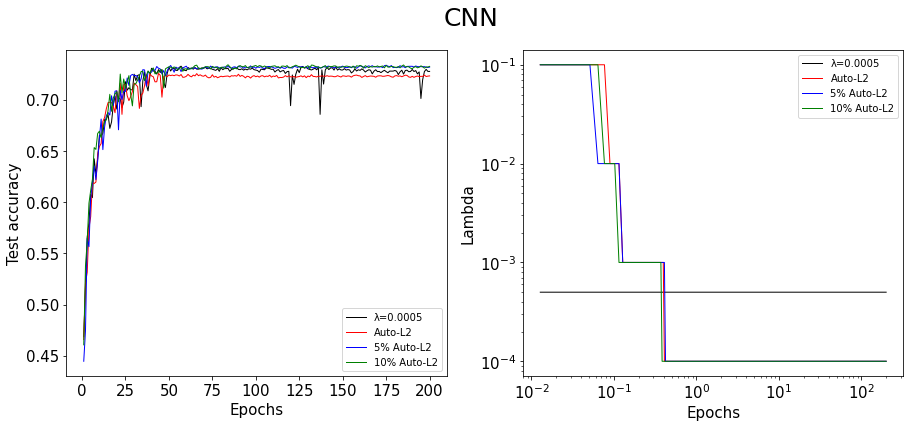

In [137]:
legend = ["λ=0.0005" ,"Auto-L2", "5% Auto-L2", "10% Auto-L2"]
plot_acc_and_lambda(df2, df4, pct5_df1, pct10_df1, 'CNN', legend, batch_num)

# Add percentage threshold into Auto L2 (with Batch Normalization)

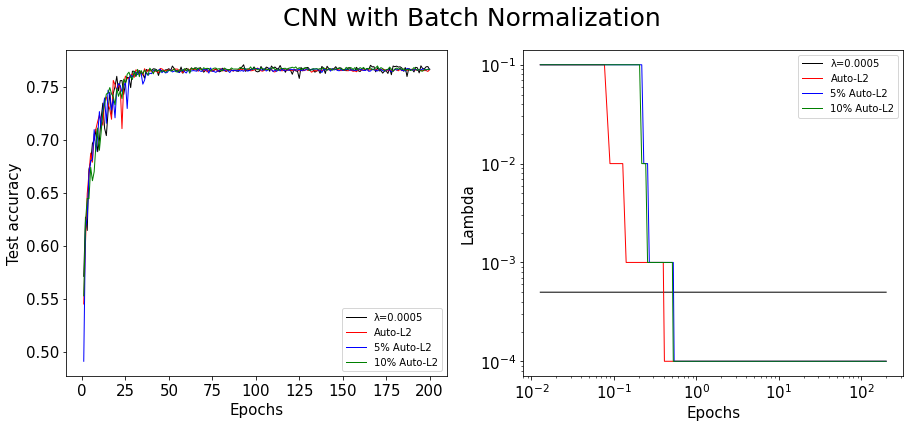

In [138]:
legend = ["λ=0.0005" ,"Auto-L2", "5% Auto-L2", "10% Auto-L2"]
plot_acc_and_lambda(bn_df2, bn_df4, pct5_df2, pct10_df2, 'CNN with Batch Normalization', legend, batch_num)

# Advance L2

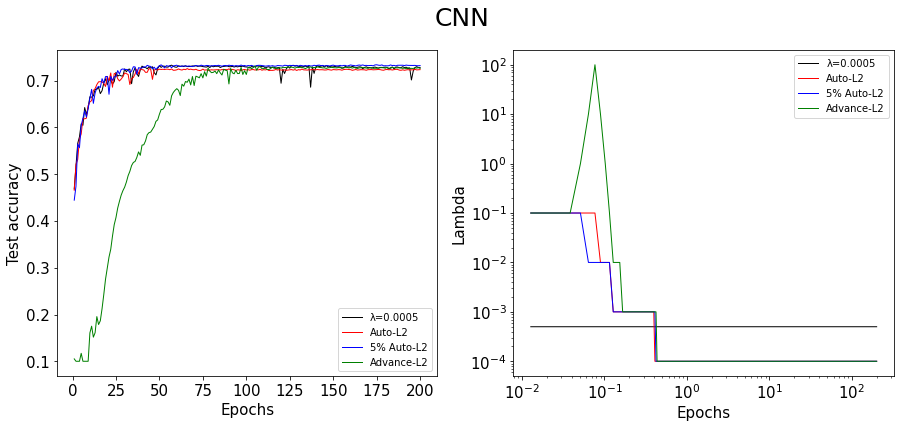

In [139]:
legend = ["λ=0.0005" ,"Auto-L2", "5% Auto-L2", "Advance-L2"]
plot_acc_and_lambda(df2, df4, pct5_df1, adv_df1, 'CNN', legend, batch_num)

# Advance L2 (with Batch Normalization)

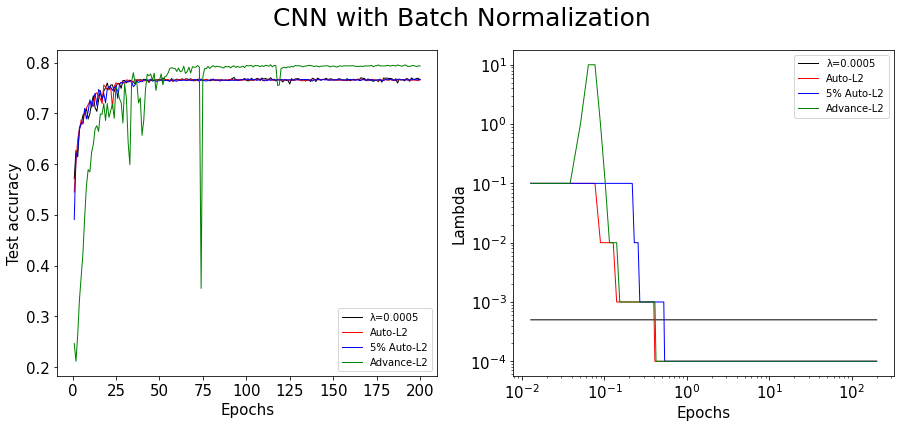

In [140]:
legend = ["λ=0.0005" ,"Auto-L2", "5% Auto-L2", "Advance-L2"]
plot_acc_and_lambda(bn_df2, bn_df4, pct5_df2, adv_df2, 'CNN with Batch Normalization', legend, batch_num)

# Advance L2 with percentage

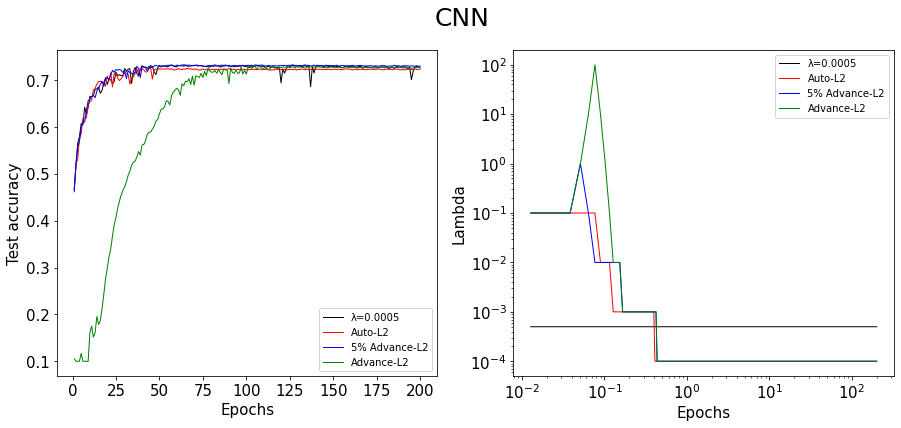

In [145]:
legend = ["λ=0.0005" ,"Auto-L2", "5% Advance-L2", "Advance-L2"]
plot_acc_and_lambda(df2, df4, adv_5_df1, adv_df1, 'CNN', legend, batch_num)

# Advance L2 with percentage (with Batch Normalization)

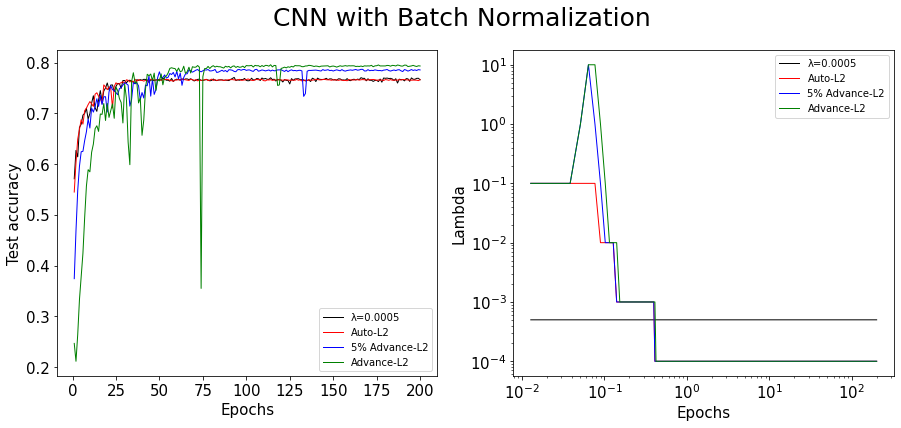

In [146]:
legend = ["λ=0.0005" ,"Auto-L2", "5% Advance-L2", "Advance-L2"]
plot_acc_and_lambda(bn_df2, bn_df4, adv_5_df2, adv_df2, 'CNN with Batch Normalization', legend, batch_num)

In [155]:
adv_5_df1[adv_5_df1['epochs'] == 0].head(50)

,epochs,steps,Lambda_L2s,train_bareloss,train_loss,train_acc,test_bareloss,test_loss,test_acc,id,num_epochs,batch_size,batch_norm,learning_rate,epoch_steps
0,0,5,0.1000,2.233476,137.920334,17.18750,0.017706,1.085352,16.53,cnn_AdvanceL2_by5pctg_wobn_200epochs,200,128,False,0.01,0.012788
1,0,10,0.1000,2.149751,135.149658,28.12500,0.017171,1.063680,23.18,cnn_AdvanceL2_by5pctg_wobn_200epochs,200,128,False,0.01,0.025575
2,0,15,0.1000,2.159894,132.527969,21.09375,0.016859,1.042656,24.74,cnn_AdvanceL2_by5pctg_wobn_200epochs,200,128,False,0.01,0.038363
3,0,20,1.0000,2.161165,1106.898926,24.21875,0.016880,8.398769,24.60,cnn_AdvanceL2_by5pctg_wobn_200epochs,200,128,False,0.01,0.051151
4,0,25,0.1000,2.135954,106.554230,24.21875,0.016685,0.838300,28.46,cnn_AdvanceL2_by5pctg_wobn_200epochs,200,128,False,0.01,0.063939
5,0,30,0.0100,2.148953,12.532909,28.12500,0.016402,0.098403,30.01,cnn_AdvanceL2_by5pctg_wobn_200epochs,200,128,False,0.01,0.076726
6,0,35,0.0100,2.039512,12.403339,32.03125,0.016188,0.098030,28.62,cnn_AdvanceL2_by5pctg_wobn_200epochs,200,128,False,0.01,0.089514
7,0,40,0.0100,2.070232,12.413975,25.78125,0.016008,0.097692,30.59,cnn_AdvanceL2_by5pctg_wobn_200epochs,200,128,False,0.01,0.102302
8,0,45,0.0100,1.967467,12.291194,28.12500,0.015813,0.097339,29.74,cnn_AdvanceL2_by5pctg_wobn_200epochs,200,128,False,0.01,0.115090
9,0,50,0.0100,2.057296,12.361109,27.34375,0.015659,0.097027,31.15,cnn_AdvanceL2_by5pctg_wobn_200epochs,200,128,False,0.01,0.127877


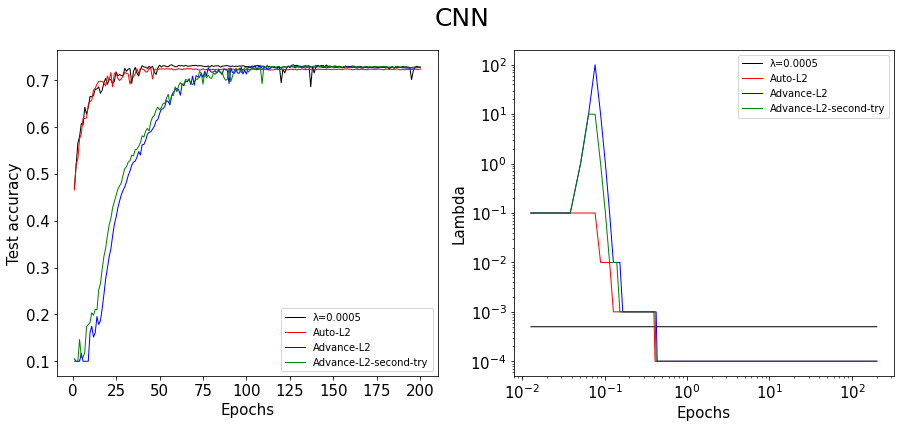

In [4]:
legend = ["λ=0.0005" ,"Auto-L2", "Advance-L2", "Advance-L2-second-try"]
plot_acc_and_lambda(df2, df4, adv_df1, adv_df1c, 'CNN', legend, batch_num)

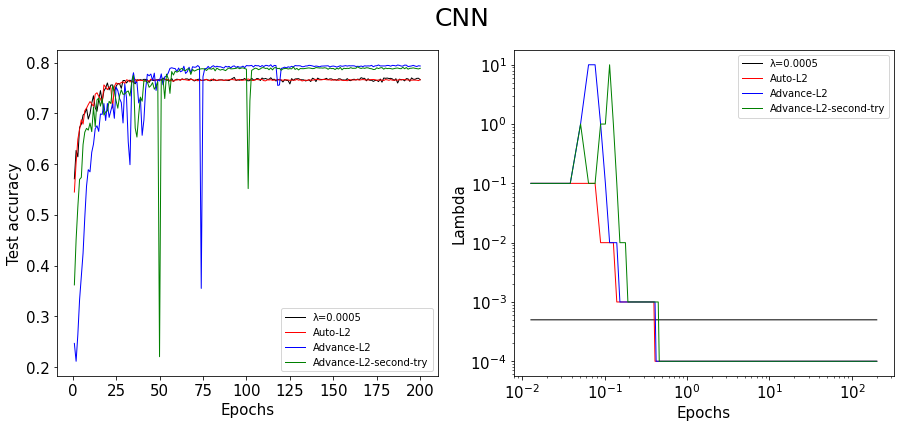

In [5]:
legend = ["λ=0.0005" ,"Auto-L2", "Advance-L2", "Advance-L2-second-try"]
plot_acc_and_lambda(bn_df2, bn_df4, adv_df2, adv_df2c, 'CNN', legend, batch_num)